In [25]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [26]:
def simulacija_kretanja_projektila(alpha, v0, k, delta_t, m, g = 9.81):
    x = 0
    y = 0
    vx = v0 * np.cos(np.radians(alpha))
    vy = v0 * np.sin(np.radians(alpha))
    ke_pocetna = 0.5 * m * v0**2

    x_lista = [x]
    y_lista = [y]
    ke_lista = [ke_pocetna]

    while y >= 0:
        vx = vx - k * vx * delta_t
        vy = vy - (g + k * vy) * delta_t
        x = x + vx * delta_t
        y = y + vy * delta_t
        ke = 0.5 * m * (vx**2 + vy**2)

        x_lista.append(x)
        y_lista.append(y)
        ke_lista.append(ke)

    return x_lista, y_lista, ke_lista

In [27]:
alpha = 45  # Ugao ispaljivanja u stepenima
v0 = 30     # Početna brzina
k = 0.1     # Koeficijent otpora vazduha
delta_t = 0.01  # Vremenski korak
m = 1.0     # Masa tela

In [28]:
x_max = 0
alpha_xmax = 0 

for i in np.linspace(0, 90, 500):
    x_projektila, y_projektila, ke_projektila = simulacija_kretanja_projektila(i, v0, k, delta_t, m)
    x = max(x_projektila)
    
    if x_max < x:
        x_max = x
        alpha_xmax = i

x_max, alpha_xmax

(71.11698181006041, 41.66332665330662)

In [29]:
x_projektila, y_projektila, ke_projektila = simulacija_kretanja_projektila(90, v0, k, delta_t, m)
y_max = max(y_projektila)

y_max

38.07681449225639

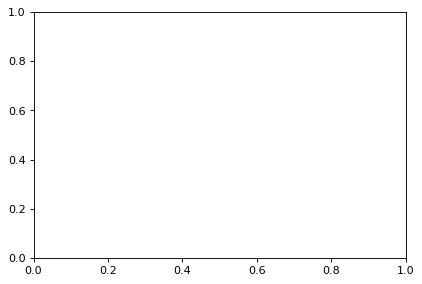

In [58]:
x_projektila_sa, y_projektila_sa, ke_projektila_sa = simulacija_kretanja_projektila(alpha, v0, k, delta_t, m)
x_projektila_bez, y_projektila_bez, ke_projektila_bez = simulacija_kretanja_projektila(alpha, v0, 0, delta_t, m)

fig, ax = plt.subplots(figsize=(6, 4), dpi=80)

def update(frame):
    ax.clear()
    
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 30])

    if frame < len(x_projektila_sa):
        ax.plot(x_projektila_sa[:frame], y_projektila_sa[:frame], label='Projektil sa otporom vazduha')
    else:
        ax.plot(x_projektila_sa, y_projektila_sa, label='Projektil sa otporom vazduha')
        
    if frame < len(x_projektila_bez):
        ax.plot(x_projektila_bez[:frame], y_projektila_bez[:frame], label='Projektil bez otpora vazduha')
    else:
        ax.plot(x_projektila_bez, y_projektila_bez, label='Projektil bez otpora vazduha')
    
    ax.set_title('Simulacija kretanja projektila sa i bez otpora vazduha')
    ax.set_xlabel('Distanca (m)')
    ax.set_ylabel('Visina (m)')
    ax.legend()
    ax.grid(True)

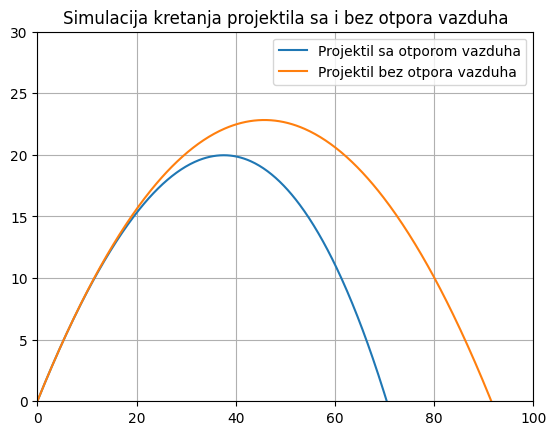

In [59]:
ani = animation.FuncAnimation(fig, update, frames=max(len(x_projektila_sa), len(x_projektila_bez)) + 50, repeat=False, interval=delta_t * 10)
ani.save('animation.gif', fps=30, writer='pillow')

    
plt.xlim([0, 100])
plt.ylim([0, 30])
plt.plot(x_projektila_sa, y_projektila_sa, label='Projektil sa otporom vazduha')
plt.plot(x_projektila_bez, y_projektila_bez, label='Projektil bez otpora vazduha')
plt.title('Simulacija kretanja projektila sa i bez otpora vazduha')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
gubitak_energije = ke_projektila[0] - ke_projektila[-1]
print(f"Gubitak energije: {gubitak_energije} J")

Gubitak energije: 140.60740562712755 J
